# Analysis and Visualization of Complex Agro-Environmental Data
---
## Exercise 3
#### Lucas Johannsen 

In [1]:
#hide
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')

In [2]:
filter_col = [col for col in df if col.startswith('Ca')]

In [3]:
df['freq'] = df.groupby('Catchment_name')['Catchment_name'].transform('count')
df_use = df[['freq', 'Catchment_name', 'temp_ann']]

In [4]:
df_use_one_catch = df_use.drop_duplicates(['Catchment_name'],keep='first')

In [5]:
df_use_top = df_use_one_catch.sort_values(['freq'],ascending = False).head()

In [6]:
df_use_highfreq = df_use[df_use['freq'] > 501]

, xlabel= "Mean annual Temp (C°)"

Text(0, 0.5, 'Catchment name')

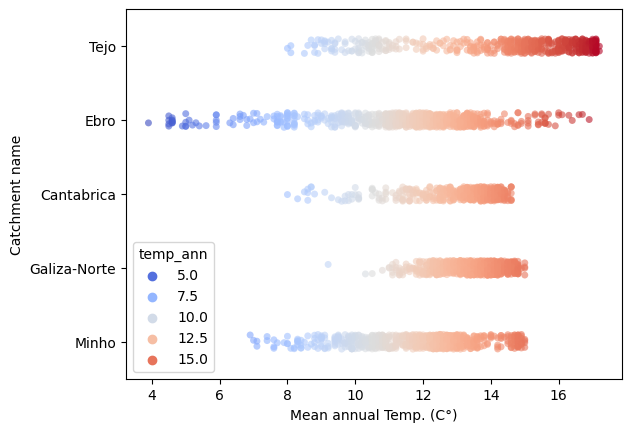

In [7]:
g1 = sns.stripplot(x="temp_ann", y="Catchment_name",data=df_use_highfreq, orient="h",hue='temp_ann', 
                  palette='coolwarm', 
                  jitter=True, edgecolor='none', alpha=.60)
g1.set_xlabel("Mean annual Temp. (C°)")
g1.set_ylabel("Catchment name")

Text(0, 0.5, 'Catchment name')

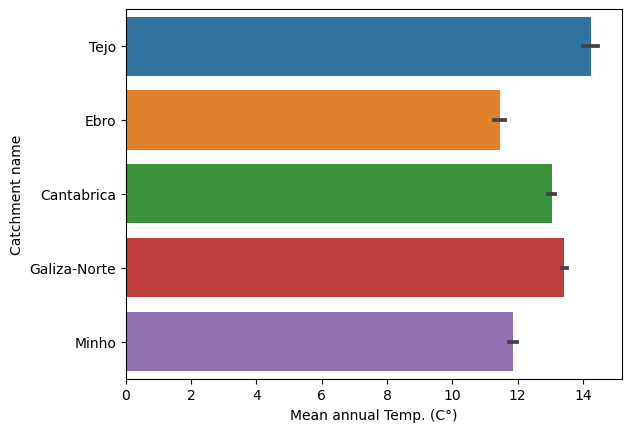

In [8]:
g1 = sns.barplot(x="temp_ann", y="Catchment_name",data=df_use_highfreq, orient="h")
g1.set_xlabel("Mean annual Temp. (C°)")
g1.set_ylabel("Catchment name")

Text(0.5, 0, 'Catchment name')

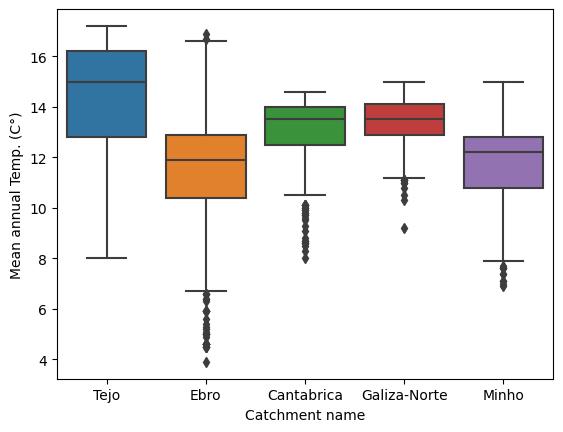

In [9]:
g1 = sns.boxplot(x="Catchment_name",y="temp_ann",data=df_use_highfreq)
g1.set_ylabel("Mean annual Temp. (C°)")
g1.set_xlabel("Catchment name")

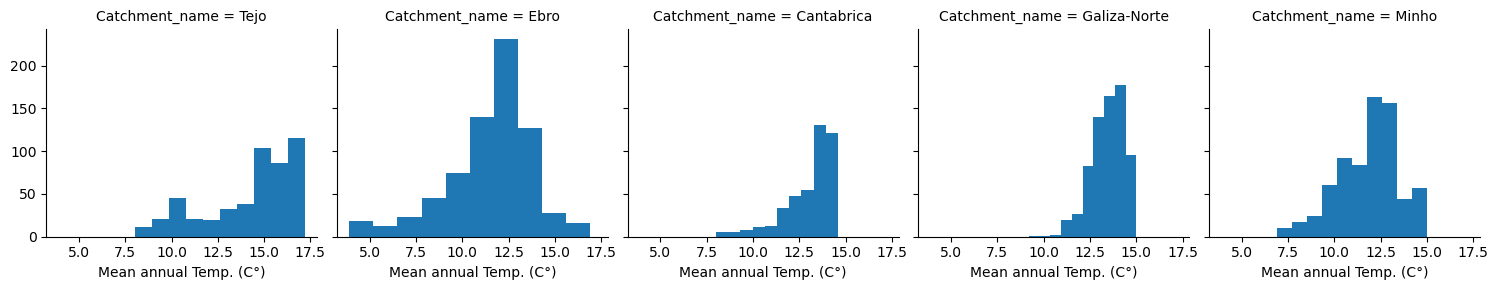

In [10]:
g1 = sns.FacetGrid(data=df_use_highfreq, col="Catchment_name")
g1 = g1.map(plt.hist, "temp_ann")
g1 = g1.set_xlabels("Mean annual Temp. (C°)")


<AxesSubplot: xlabel='temp_ann', ylabel='Count'>

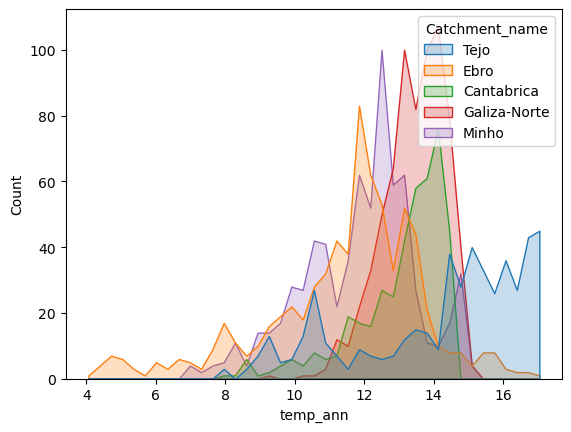

In [11]:
sns.histplot(data=df_use_highfreq, x="temp_ann", hue="Catchment_name",element="poly")

In [12]:
data = {'means' : [df['temp_ann'].head(10).mean(),df['temp_ann'].head(50).mean(), df['temp_ann'].head(100).mean(), df['temp_ann'].head(150).mean(),df['temp_ann'].head(200).mean(),df['temp_ann'].head(250).mean(),df['temp_ann'].head(300).mean(),df['temp_ann'].head(500).mean(),df['temp_ann'].head(1000).mean()],
        'sample_size' :  [10, 50, 100, 150, 200, 250, 300, 500, 1000]}

Text(0, 0.5, 'Mean annual Temp. (C°)')

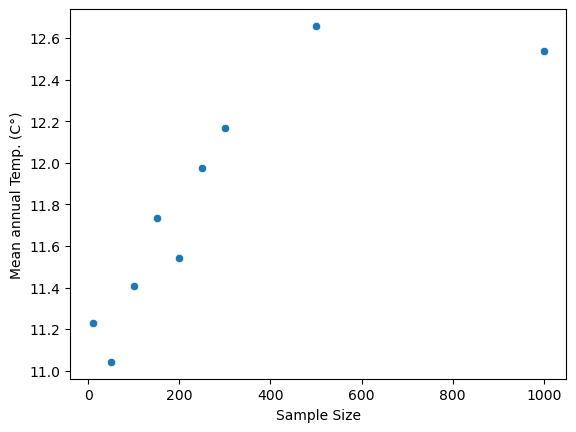

In [15]:
df_last = pd.DataFrame(data)
g4 = sns.scatterplot(data = df_last, x="sample_size",y="means")
g4.set_xlabel("Sample Size")
g4.set_ylabel("Mean annual Temp. (C°)")